In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h1>Bagging and Random Forests</h1>
<p>As the basic idea has been introduce during the lecture we only focus the implementation in python<br>
Though Bagging and Boosting can be applied to many different algorithms we only present here the method with decision trees</p>

<h3>Iris Classification</h3>

<p>We can first try to see the difference when using this approach on the iris classification problem</p>

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,0:2:1]
y = iris.target

from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

<p>Now training the classifier :</p>

In [21]:
bc = BaggingClassifier()
bc.fit(X,y)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [22]:
rfc = RandomForestClassifier()
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

<p>Mapping the parameters space and visualizing the result... and check the difference</p>

In [23]:
xx,yy = np.meshgrid(np.linspace(0.0,10.0,201),np.linspace(0.0,10.0,201))

pred_bc = bc.predict(np.c_[xx.ravel(),yy.ravel()])
Z_bc = pred_bc.reshape(np.shape(xx))

pred_rfc = rfc.predict(np.c_[xx.ravel(),yy.ravel()])
Z_rfc = pred_rfc.reshape(np.shape(xx))

(0.0, 8.0)

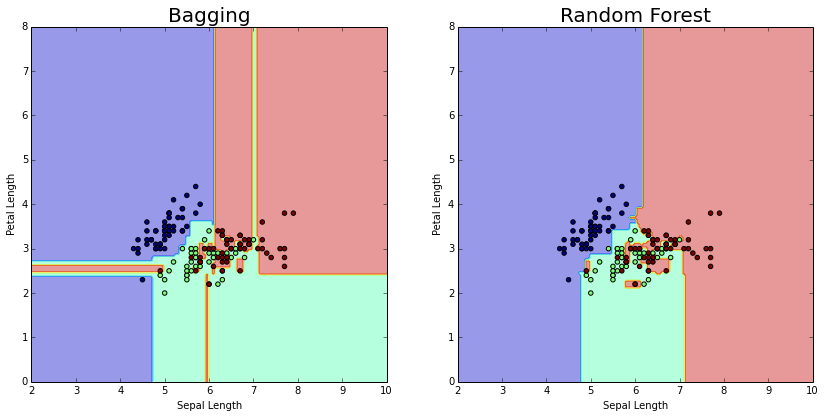

In [24]:
plt.figure(figsize=(14,7))

plt.subplot(121)
plt.contourf(xx,yy,Z_bc,alpha=0.4)
plt.scatter(X.T[0],X.T[1],c=y)
plt.axis('scaled')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Bagging',fontsize=20)
plt.xlim(2.0,10.0)
plt.ylim(0.0,8.0)

plt.subplot(122)
plt.contourf(xx,yy,Z_rfc,alpha=0.4)
plt.scatter(X.T[0],X.T[1],c=y)
plt.axis('scaled')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Random Forest',fontsize=20)
plt.xlim(2.0,10.0)
plt.ylim(0.0,8.0)

<h4> NOTE : I have only call the algorithm with its default value, it is worth changing them (but think before doing any changes)</h4>

<h3>Boston Regression</h3>
<p>Same as the iris classification case, I introduce here the implementation of Bagging and Random Forest method for regression trees using the Boston datasets<br>
<p>... let's see if you can spot the differences ;)</p>

In [25]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston['data']
target = boston['target']

In [26]:
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor

br = BaggingRegressor()
br.fit(np.c_[data[:,5],data[:,12]],target)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [27]:
rfr = RandomForestRegressor()
rfr.fit(np.c_[data[:,5],data[:,12]],target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [28]:
xx,yy = np.meshgrid(np.linspace(0.0,10.0,301),np.linspace(0.0,100.0,301))
pred_br = br.predict(np.c_[xx.ravel(),yy.ravel()])
pred_br = pred_br.reshape(np.shape(xx))

pred_rfr = rfr.predict(np.c_[xx.ravel(),yy.ravel()])
pred_rfr = pred_rfr.reshape(np.shape(xx))

(0.0, 50.0)

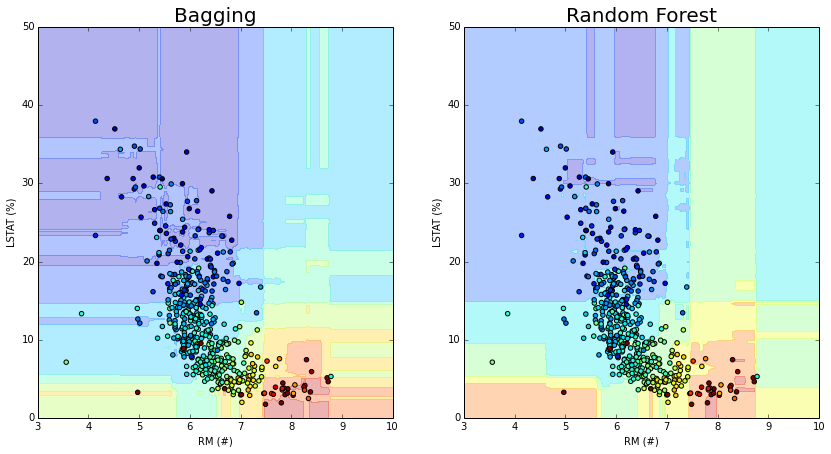

In [29]:
plt.figure(figsize=(14,7))

plt.subplot(121)
plt.contourf(xx,yy,pred_br,alpha=0.3,linewidths=0.1)
plt.scatter(data[:,5],data[:,12],c=target)
plt.xlabel('RM (#)')
plt.ylabel('LSTAT (%)')
plt.title('Bagging',fontsize=20)
plt.xlim(3,10)
plt.ylim(0.0,50.0)


plt.subplot(122)
plt.contourf(xx,yy,pred_rfr,alpha=0.3,linewidths=0.1)
plt.scatter(data[:,5],data[:,12],c=target)
plt.xlabel('RM (#)')
plt.ylabel('LSTAT (%)')
plt.title('Random Forest',fontsize=20)
plt.xlim(3,10)
plt.ylim(0.0,50.0)

<h4> NOTE : I have only call the algorithm with its default value, it is worth changing them (but think before doing any changes)</h4>